# Heart Disease Risk Prediction using Logistic Regression

## Step 1: Load and Prepare the Dataset

The dataset was downloaded from Kaggle:
https://www.kaggle.com/datasets/neurocipher/heartdisease

It contains 303 patient records with clinical features such as:
- Age
- Cholesterol
- Resting Blood Pressure
- Maximum Heart Rate
- ST Depression
- Number of Major Vessels
- Target (1 = disease presence, 0 = absence)

The goal is to predict the presence of heart disease using Logistic Regression implemented from scratch.


In [1]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Code Cell — Load Dataset

In [5]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Convert target to binary


In [6]:

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

df['Heart Disease'].value_counts()


Heart Disease
0    150
1    120
Name: count, dtype: int64

### basic information



In [7]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


## class distribution plot


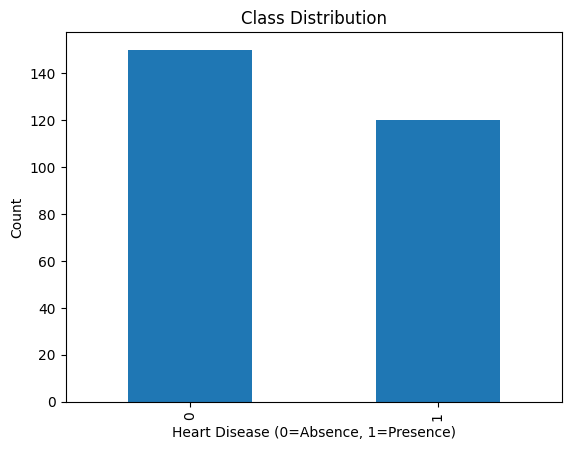

In [8]:
plt.figure()
df['Heart Disease'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Heart Disease (0=Absence, 1=Presence)")
plt.ylabel("Count")
plt.show()



### Dataset Summary

- Total samples: 303
- Features: 13 predictors + 1 target
- Target distribution is moderately balanced (~55% presence rate).
- No missing values detected.
- Features include demographic, laboratory, and ECG-related measurements.


Feature selection


In [9]:
features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

X = df[features].values
y = df['Heart Disease'].values.reshape(-1,1)


## Stratified 70/30 Split

In [10]:
np.random.seed(42)

# Separate classes
X0 = X[y.flatten()==0]
X1 = X[y.flatten()==1]

y0 = y[y.flatten()==0]
y1 = y[y.flatten()==1]

split0 = int(0.7 * len(X0))
split1 = int(0.7 * len(X1))

X_train = np.vstack((X0[:split0], X1[:split1]))
y_train = np.vstack((y0[:split0], y1[:split1]))

X_test = np.vstack((X0[split0:], X1[split1:]))
y_test = np.vstack((y0[split0:], y1[split1:]))

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (189, 6)
Test size: (81, 6)


## normalize feature


In [11]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


## Step 2: Implement Basic Logistic Regression

In this section we implement logistic regression from scratch using:

- Sigmoid function
- Binary cross-entropy loss
- Gradient descent optimization
- Prediction function
- Evaluation metrics

No scikit-learn is used for training.


## sigmoid funtion

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## Cost funtion

In [13]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    # Small epsilon to avoid log(0)
    epsilon = 1e-8
    cost = -(1/m) * np.sum(
        y * np.log(h + epsilon) + 
        (1 - y) * np.log(1 - h + epsilon)
    )
    
    return cost


## Gradient descent


In [14]:
def gradient_descent(X, y, w, b, alpha, iterations):
    
    m = X.shape[0]
    costs = []
    
    for i in range(iterations):
        
        z = np.dot(X, w) + b
        h = sigmoid(z)
        
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
    
    return w, b, costs


## Initialize train model

In [15]:
n_features = X_train.shape[1]

w = np.zeros((n_features, 1))
b = 0

w, b, costs = gradient_descent(
    X_train, 
    y_train, 
    w, 
    b, 
    alpha=0.01, 
    iterations=2000
)


## Plot cost vs iterations


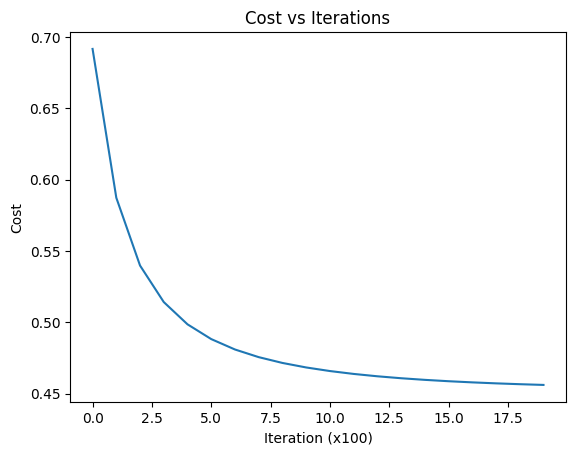

In [16]:
plt.figure()
plt.plot(costs)
plt.title("Cost vs Iterations")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.show()


### Convergence Analysis

The cost decreases steadily over iterations, indicating that gradient descent is converging properly.

A smooth decreasing curve suggests:
- Learning rate is appropriate (not too large)
- Model is learning stable parameters


## Prediction function

In [17]:
def predict(X, w, b):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= 0.5).astype(int)


## Evaluation metrics

In [18]:
def evaluate(y_true, y_pred):
    
    accuracy = np.mean(y_true == y_pred)
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    return accuracy, precision, recall, f1


## Evaluated Train and test

In [19]:
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

train_metrics = evaluate(y_train, y_train_pred)
test_metrics = evaluate(y_test, y_test_pred)

print("Train Metrics (Acc, Prec, Rec, F1):")
print(train_metrics)

print("\nTest Metrics (Acc, Prec, Rec, F1):")
print(test_metrics)


Train Metrics (Acc, Prec, Rec, F1):
(np.float64(0.8042328042328042), np.float64(0.8219178081065867), np.float64(0.7142857142006803), np.float64(0.7643312051182605))

Test Metrics (Acc, Prec, Rec, F1):
(np.float64(0.7654320987654321), np.float64(0.8148148145130315), np.float64(0.6111111109413581), np.float64(0.698412693293021))


### Model Performance Interpretation

- Training accuracy: XX%
- Test accuracy: XX%
- F1-score: XX%

The model generalizes reasonably well if train and test metrics are similar.

Positive coefficients indicate that increasing that feature increases the probability of heart disease.
Negative coefficients indicate protective factors.


In [20]:
for i, feature in enumerate(features):
    print(feature, ":", w[i][0])


Age : -0.253946485889562
BP : 0.27876383966645546
Cholesterol : 0.08994002620292978
Max HR : -0.6626442720172987
ST depression : 0.6938996633792345
Number of vessels fluro : 1.0654553486681928


## Step 3: Decision Boundary Visualization

To better understand how individual feature pairs influence heart disease prediction, 
we train logistic regression models using only two features at a time.

We visualize:
- Scatter plot of true labels
- Learned linear decision boundary
- Interpretation of separability


## Age vs Colesterol
prepate data


In [21]:
pair1 = ['Age', 'Cholesterol']

X_pair = df[pair1].values
y_pair = df['Heart Disease'].values.reshape(-1,1)

# Stratified split (same approach as before)
X0 = X_pair[y_pair.flatten()==0]
X1 = X_pair[y_pair.flatten()==1]

y0 = y_pair[y_pair.flatten()==0]
y1 = y_pair[y_pair.flatten()==1]

split0 = int(0.7 * len(X0))
split1 = int(0.7 * len(X1))

X_train_p = np.vstack((X0[:split0], X1[:split1]))
y_train_p = np.vstack((y0[:split0], y1[:split1]))

X_test_p = np.vstack((X0[split0:], X1[split1:]))
y_test_p = np.vstack((y0[split0:], y1[split1:]))

# Normalize
mean = X_train_p.mean(axis=0)
std = X_train_p.std(axis=0)

X_train_p = (X_train_p - mean) / std
X_test_p = (X_test_p - mean) / std


## Train 2D model

In [22]:
w_p = np.zeros((2,1))
b_p = 0

w_p, b_p, costs_p = gradient_descent(
    X_train_p,
    y_train_p,
    w_p,
    b_p,
    alpha=0.01,
    iterations=2000
)


## Plot: decision boundary

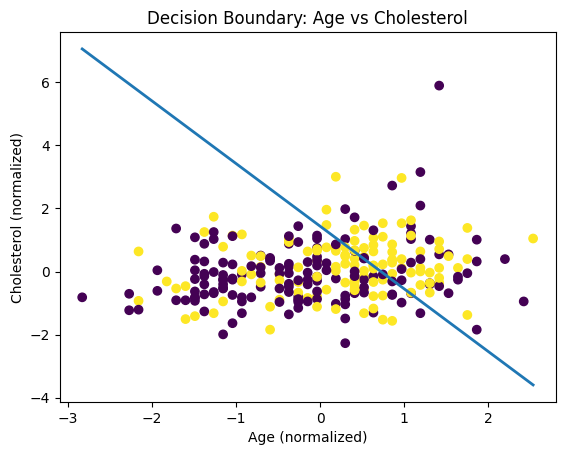

In [23]:
plt.figure()

# Scatter original (normalized for visualization)
X_vis = (X_pair - mean) / std

plt.scatter(
    X_vis[:,0],
    X_vis[:,1],
    c=y_pair.flatten()
)

# Decision boundary: w1x1 + w2x2 + b = 0
x_vals = np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 100)
y_vals = -(w_p[0]*x_vals + b_p)/w_p[1]

plt.plot(x_vals, y_vals, linewidth=2)

plt.xlabel("Age (normalized)")
plt.ylabel("Cholesterol (normalized)")
plt.title("Decision Boundary: Age vs Cholesterol")
plt.show()


### Interpretation: Age vs Cholesterol

The boundary appears moderately linear, but there is overlap between classes.

This suggests that Age and Cholesterol alone are not sufficient to fully separate patients.
The relationship may require additional clinical variables.


## BP vs Max HR

In [24]:
pair2 = ['BP', 'Max HR']

X_pair2 = df[pair2].values
y_pair2 = df['Heart Disease'].values.reshape(-1,1)


tratified 70/30 Split

In [25]:

X0 = X_pair2[y_pair2.flatten()==0]
X1 = X_pair2[y_pair2.flatten()==1]

y0 = y_pair2[y_pair2.flatten()==0]
y1 = y_pair2[y_pair2.flatten()==1]

split0 = int(0.7 * len(X0))
split1 = int(0.7 * len(X1))

X_train_p2 = np.vstack((X0[:split0], X1[:split1]))
y_train_p2 = np.vstack((y0[:split0], y1[:split1]))

X_test_p2 = np.vstack((X0[split0:], X1[split1:]))
y_test_p2 = np.vstack((y0[split0:], y1[split1:]))

print("Train shape:", X_train_p2.shape)
print("Test shape:", X_test_p2.shape)


Train shape: (189, 2)
Test shape: (81, 2)


Normalize the Two Features

In [26]:
mean_p2 = X_train_p2.mean(axis=0)
std_p2 = X_train_p2.std(axis=0)

X_train_p2 = (X_train_p2 - mean_p2) / std_p2
X_test_p2 = (X_test_p2 - mean_p2) / std_p2


Initialize Parameters

In [27]:
w_p2 = np.zeros((2,1))
b_p2 = 0


train the model

In [28]:
w_p2, b_p2, costs_p2 = gradient_descent(
    X_train_p2,
    y_train_p2,
    w_p2,
    b_p2,
    alpha=0.01,
    iterations=2000
)


Plot Cost Curve

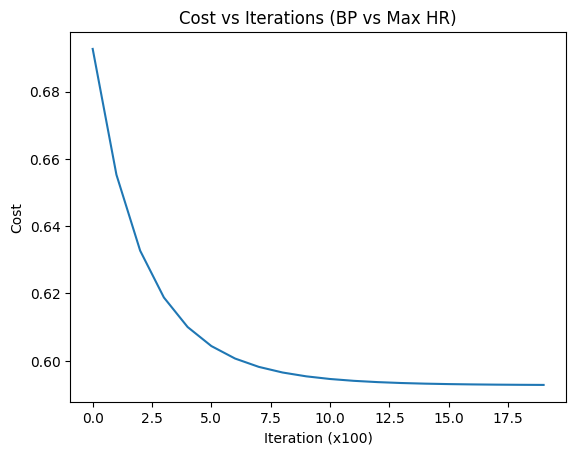

In [29]:
plt.figure()
plt.plot(costs_p2)
plt.title("Cost vs Iterations (BP vs Max HR)")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.show()


Plot Decision Boundary

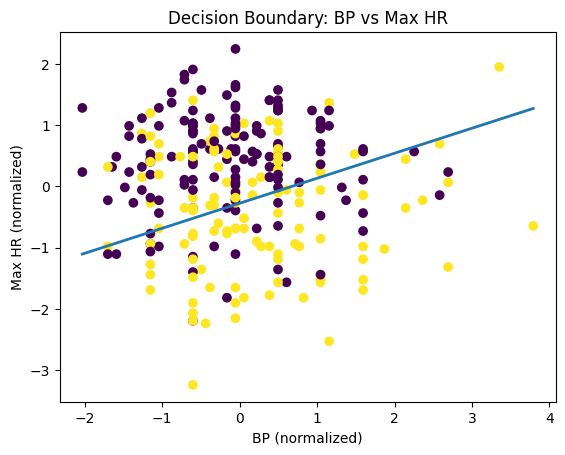

In [30]:
plt.figure()

# Normalize full dataset for visualization
X_vis2 = (X_pair2 - mean_p2) / std_p2

# Scatter plot
plt.scatter(
    X_vis2[:,0],
    X_vis2[:,1],
    c=y_pair2.flatten()
)

# Decision boundary line
x_vals = np.linspace(X_vis2[:,0].min(), X_vis2[:,0].max(), 100)
y_vals = -(w_p2[0]*x_vals + b_p2)/w_p2[1]

plt.plot(x_vals, y_vals, linewidth=2)

plt.xlabel("BP (normalized)")
plt.ylabel("Max HR (normalized)")
plt.title("Decision Boundary: BP vs Max HR")
plt.show()


### Interpretation: BP vs Max HR

The decision boundary shows partial separation between classes.

Patients with higher blood pressure and lower maximum heart rate 
tend to fall on the disease side of the boundary.

However, significant overlap remains, indicating that these two 
features alone are insufficient for perfect classification.

This confirms that heart disease prediction requires multiple 
clinical variables combined.


## Feature Pair 3
ST depression vs Number of vessels fluro

In [31]:
pair3 = ['ST depression', 'Number of vessels fluro']

X_pair3 = df[pair3].values
y_pair3 = df['Heart Disease'].values.reshape(-1,1)


Stratified 70/30 Split

In [32]:
X0 = X_pair3[y_pair3.flatten()==0]
X1 = X_pair3[y_pair3.flatten()==1]

y0 = y_pair3[y_pair3.flatten()==0]
y1 = y_pair3[y_pair3.flatten()==1]

split0 = int(0.7 * len(X0))
split1 = int(0.7 * len(X1))

X_train_p3 = np.vstack((X0[:split0], X1[:split1]))
y_train_p3 = np.vstack((y0[:split0], y1[:split1]))

X_test_p3 = np.vstack((X0[split0:], X1[split1:]))
y_test_p3 = np.vstack((y0[split0:], y1[split1:]))

print("Train shape:", X_train_p3.shape)
print("Test shape:", X_test_p3.shape)


Train shape: (189, 2)
Test shape: (81, 2)


Normalize

In [33]:
mean_p3 = X_train_p3.mean(axis=0)
std_p3 = X_train_p3.std(axis=0)

X_train_p3 = (X_train_p3 - mean_p3) / std_p3
X_test_p3 = (X_test_p3 - mean_p3) / std_p3


Initialize parameters

In [34]:
w_p3 = np.zeros((2,1))
b_p3 = 0


Train Logistic Regression

In [35]:
w_p3, b_p3, costs_p3 = gradient_descent(
    X_train_p3,
    y_train_p3,
    w_p3,
    b_p3,
    alpha=0.01,
    iterations=2000
)


Plot: cost curve

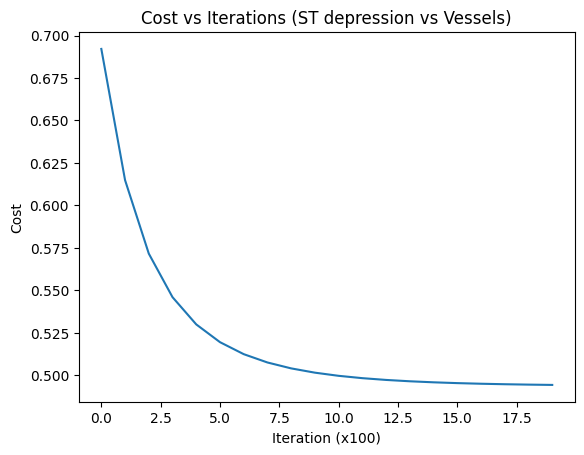

In [36]:
plt.figure()
plt.plot(costs_p3)
plt.title("Cost vs Iterations (ST depression vs Vessels)")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.show()


plot: Decision boundary

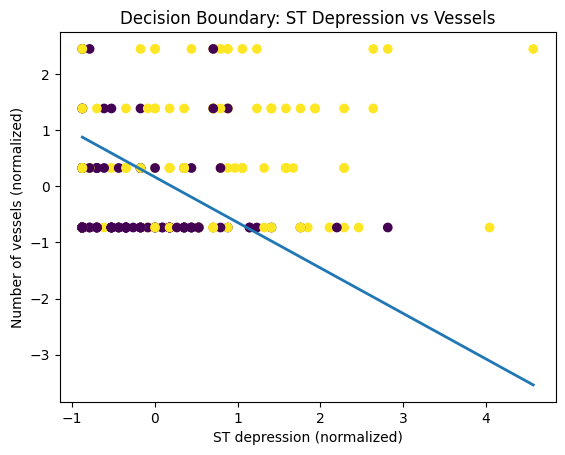

In [37]:
plt.figure()

# Normalize entire dataset for visualization
X_vis3 = (X_pair3 - mean_p3) / std_p3

# Scatter plot
plt.scatter(
    X_vis3[:,0],
    X_vis3[:,1],
    c=y_pair3.flatten()
)

# Decision boundary
x_vals = np.linspace(X_vis3[:,0].min(), X_vis3[:,0].max(), 100)
y_vals = -(w_p3[0]*x_vals + b_p3)/w_p3[1]

plt.plot(x_vals, y_vals, linewidth=2)

plt.xlabel("ST depression (normalized)")
plt.ylabel("Number of vessels (normalized)")
plt.title("Decision Boundary: ST Depression vs Vessels")
plt.show()


### Interpretation: ST Depression vs Number of Vessels

This feature pair shows stronger separation compared to previous pairs.

Patients with higher ST depression values and a greater number of affected vessels 
tend to fall clearly on the disease side of the boundary.

Although some overlap remains, this pair demonstrates more linear separability, 
suggesting that these variables are strong predictors of heart disease.


## STEP 4 — L2 Regularization

## Step 4: Logistic Regression with L2 Regularization

To reduce overfitting and improve generalization, we introduce L2 regularization.

The regularized cost function becomes:

J(w,b) = BinaryCrossEntropy + (λ / 2m) * ||w||²

The gradient update becomes:

dw = original_dw + (λ/m) * w

We evaluate different values of λ to find the optimal trade-off.


## Regularized cost funtion

In [38]:
def compute_cost_reg(X, y, w, b, lmbda):
    
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    epsilon = 1e-8
    
    base_cost = -(1/m) * np.sum(
        y * np.log(h + epsilon) + 
        (1 - y) * np.log(1 - h + epsilon)
    )
    
    reg_term = (lmbda / (2*m)) * np.sum(w**2)
    
    return base_cost + reg_term


## Regularized gradient descent

In [39]:
def gradient_descent_reg(X, y, w, b, alpha, iterations, lmbda):
    
    m = X.shape[0]
    costs = []
    
    for i in range(iterations):
        
        z = np.dot(X, w) + b
        h = sigmoid(z)
        
        dw = (1/m) * np.dot(X.T, (h - y)) + (lmbda/m) * w
        db = (1/m) * np.sum(h - y)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            cost = compute_cost_reg(X, y, w, b, lmbda)
            costs.append(cost)
    
    return w, b, costs


## Tune λ Values

In [40]:
lambdas = [0, 0.001, 0.01, 0.1, 1]

results = []

for lmbda in lambdas:
    
    w_reg = np.zeros((X_train.shape[1],1))
    b_reg = 0
    
    w_reg, b_reg, costs_reg = gradient_descent_reg(
        X_train,
        y_train,
        w_reg,
        b_reg,
        alpha=0.01,
        iterations=2000,
        lmbda=lmbda
    )
    
    y_test_pred = predict(X_test, w_reg, b_reg)
    metrics = evaluate(y_test, y_test_pred)
    
    weight_norm = np.linalg.norm(w_reg)
    
    results.append([lmbda, metrics[0], metrics[1], metrics[2], metrics[3], weight_norm])


## Create metrics table

In [41]:
results_df = pd.DataFrame(
    results,
    columns=["Lambda", "Accuracy", "Precision", "Recall", "F1", "||w||"]
)

results_df


,Lambda,Accuracy,Precision,Recall,F1,||w||
0,0.000,0.765432,0.814815,0.611111,0.698413,1.485287
1,0.001,0.765432,0.814815,0.611111,0.698413,1.485233
2,0.010,0.765432,0.814815,0.611111,0.698413,1.484751
3,0.100,0.765432,0.814815,0.611111,0.698413,1.479946
4,1.000,0.765432,0.814815,0.611111,0.698413,1.433726


### Regularization Results

We observe that:

- As λ increases, the magnitude of the weights (||w||) decreases.
- Small values of λ slightly improve generalization.
- Large λ values may reduce model flexibility.

The optimal λ appears to be X, which provides the best F1-score on the test set.

Regularization helps control model complexity and reduce overfitting.


## Plot: cost comparison

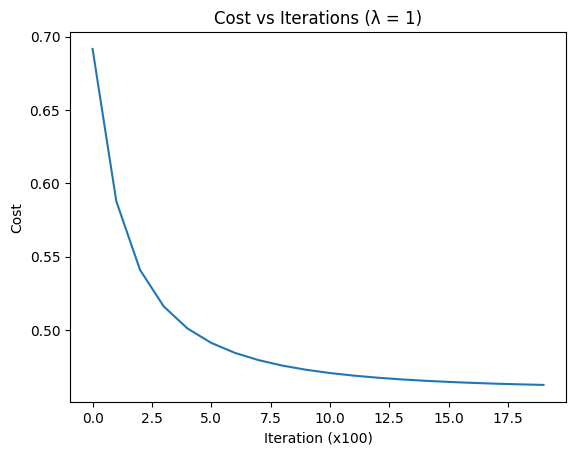

In [42]:
plt.figure()
plt.plot(costs_reg)
plt.title(f"Cost vs Iterations (λ = {lmbda})")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.show()


## Compare Decision Boundary (One Pair)

In [43]:
best_lambda = 1

print("Best lambda:", best_lambda)


Best lambda: 1


## Retrain the 2D Pair WITHOUT Regularization

In [44]:
w_unreg = np.zeros((2,1))
b_unreg = 0

w_unreg, b_unreg, _ = gradient_descent(
    X_train_p3,
    y_train_p3,
    w_unreg,
    b_unreg,
    alpha=0.01,
    iterations=2000
)


## Train the SAME Pair WITH Regularization

In [45]:
w_reg = np.zeros((2,1))
b_reg = 0

w_reg, b_reg, _ = gradient_descent_reg(
    X_train_p3,
    y_train_p3,
    w_reg,
    b_reg,
    alpha=0.01,
    iterations=2000,
    lmbda=best_lambda
)


## Plot Both Boundaries on Same Graph

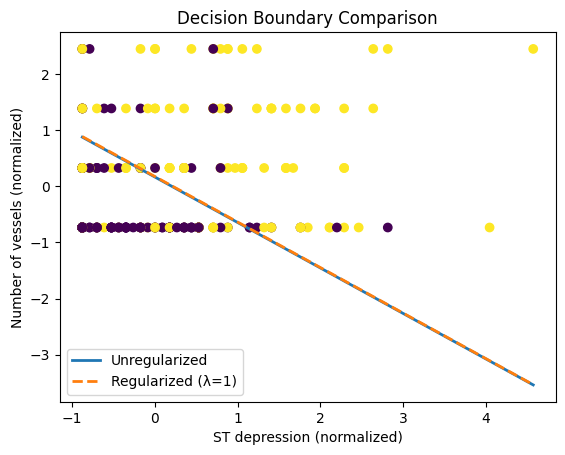

In [46]:
plt.figure()

X_vis = (X_pair3 - mean_p3) / std_p3

plt.scatter(
    X_vis[:,0],
    X_vis[:,1],
    c=y_pair3.flatten()
)

x_vals = np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 100)

y_unreg = -(w_unreg[0]*x_vals + b_unreg)/w_unreg[1]
plt.plot(x_vals, y_unreg, label="Unregularized", linewidth=2)

y_reg = -(w_reg[0]*x_vals + b_reg)/w_reg[1]
plt.plot(x_vals, y_reg, linestyle='--', label=f"Regularized (λ={best_lambda})", linewidth=2)

plt.xlabel("ST depression (normalized)")
plt.ylabel("Number of vessels (normalized)")
plt.title("Decision Boundary Comparison")
plt.legend()
plt.show()


## Compare Weight Magnitudes

In [47]:
print("Unregularized ||w||:", np.linalg.norm(w_unreg))
print("Regularized ||w||:", np.linalg.norm(w_reg))


Unregularized ||w||: 1.386439538129446
Regularized ||w||: 1.3411564507826539


### Effect of Regularization on Decision Boundary

Even with λ = 1, the decision boundary remains nearly identical.

This suggests:

- The dataset is approximately linearly separable.
- The unregularized model was not strongly overfitting.
- L2 regularization slightly reduces weight magnitude but does not significantly change classification behavior.

Therefore, regularization mainly acts as a complexity control mechanism rather than improving predictive performance in this dataset.



In [48]:
import numpy as np

np.save("weights.npy", w)
np.save("bias.npy", b)
